In [51]:
import numpy as np
import pandas as pd
from keras.preprocessing.text import Tokenizer

%matplotlib inline

Reading and preparing data.

In [52]:
data_train = pd.read_csv('data/train.csv', index_col='id')
data_test = pd.read_csv('data/test.csv', index_col='id')

In [53]:
documents = data_train['text'].tolist() + data_test['text'].tolist()

In [54]:
vocab_size = 2000 # number of words in dictionary
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(documents)

In [55]:
encoded_train_docs = tokenizer.texts_to_sequences(list(data_train['text']))
encoded_test_docs = tokenizer.texts_to_sequences(list(data_test['text']))

In [56]:
data_train['tokens'] = pd.Series(encoded_train_docs, index=data_train.index)
data_test['tokens'] = pd.Series(encoded_test_docs, index=data_test.index)

In [ ]:
# max_length = max(encoded_train_docs + encoded_test_docs, key=len)

In [57]:
data_train['tokens_len'] = data_train['tokens'].apply(len)
data_test['tokens_len'] = data_test['tokens'].apply(len)

Displaying sequence length distribution.

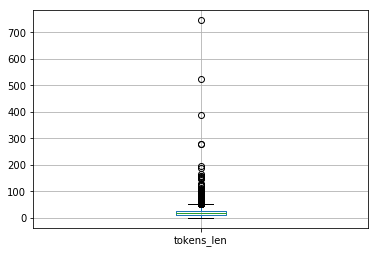

In [58]:
data_train.boxplot('tokens_len')

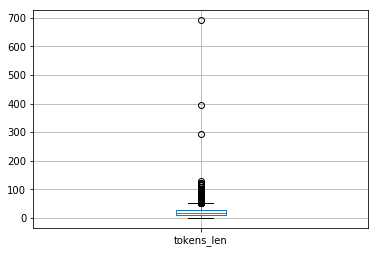

In [59]:
data_test.boxplot('tokens_len')

We see several extreme outliers above 200. Let's remove them.

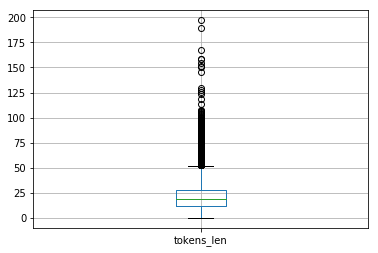

In [60]:
data_train[data_train['tokens_len'] < 200].boxplot('tokens_len')

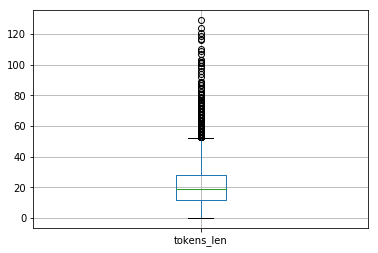

In [61]:
data_test[data_test['tokens_len'] < 200].boxplot('tokens_len')

It's reasonable to reduce length of sequence to 70 tokens. For dirty model let's just discard outliers.

In [62]:
max_length = 70
data_train = data_train[data_train['tokens_len'] <= max_length]
data_test = data_test[data_test['tokens_len'] <= max_length]

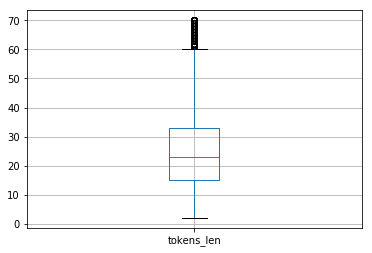

In [44]:
data_train.boxplot('tokens_len')

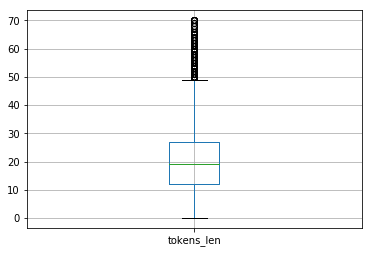

In [63]:
data_test.boxplot('tokens_len')

Looks better.

In [47]:
data_train

,text,author,tokens,tokens_len
id,,,,
id26305,"This process, however, afforded me no means of...",EAP,"[26, 3334, 139, 1295, 22, 36, 285, 2, 6426, 1,...",41
id17569,It never once occurred to me that the fumbling...,HPL,"[11, 90, 128, 725, 4, 22, 9, 1, 5966, 80, 28, ...",14
id11008,"In his left hand was a gold snuff box, from wh...",EAP,"[7, 15, 154, 173, 8, 6, 694, 5967, 560, 24, 19...",36
id27763,How lovely is spring As we looked from Windsor...,MWS,"[120, 568, 25, 766, 16, 34, 216, 24, 754, 4176...",34
id12958,"Finding nothing else, not even gold, the Super...",HPL,"[1229, 160, 735, 20, 75, 694, 1, 5214, 1464, 1...",27
id09674,"The astronomer, perhaps, at this point, took r...",EAP,"[1, 8416, 237, 21, 26, 263, 214, 3102, 7, 1, 1...",21
id13515,The surcingle hung in ribands from my body.,EAP,"[1, 9364, 698, 7, 18845, 24, 10, 225]",8
id00912,I confess that neither the structure of langua...,MWS,"[5, 1689, 9, 484, 1, 2592, 2, 4644, 183, 1, 93...",23
id16737,He shall find that I can feel my injuries; he ...,MWS,"[14, 140, 232, 9, 5, 118, 297, 10, 5970, 14, 1...",22


SyntaxError: invalid syntax (<ipython-input-20-e8a2325424e9>, line 1)

'It never once occurred to me that the fumbling might be a mere mistake.'

In [52]:
encoded_train_binary_docs = tokenizer.texts_to_matrix(list(data_train['text']))

In [53]:
encoded_train_binary_docs.shape

(19579, 29452)

In [54]:
encoded_train_count_docs = tokenizer.texts_to_matrix(list(data_train['text']), mode='count')

In [55]:
encoded_train_count_docs.shape

(19579, 29452)

In [56]:
encoded_train_count_docs

array([[ 0.,  4.,  3., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0.,  2.,  2., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.]])

In [57]:
encoded_train_binary_docs

array([[ 0.,  1.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0.,  1.,  1., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.]])

In [58]:
data_train['text'][0]

'This process, however, afforded me no means of ascertaining the dimensions of my dungeon; as I might make its circuit, and return to the point whence I set out, without being aware of the fact; so perfectly uniform seemed the wall.'